In [34]:
import seaborn as sns
import json as js
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [35]:
import csv
import glob, os

csv_files = glob.glob("/mnt/dataset/patchcore/monuseg_hyperparam/*/eval_results/results*.csv")
print(len(csv_files))




256


In [36]:
import pandas as pd
import re
import shutil

from collections import defaultdict

score_dic = dict(
    score = [],
    prob = [],
    patchsize = [],
    run = []
)

runs = defaultdict(lambda: defaultdict(list))


for f in csv_files:
    run = os.path.split(os.path.split(f)[0])[-1]
    with open(f, newline='') as csvfile:
        data = pd.read_csv(csvfile)
        score = data['instance_auroc'][0]


        print(run, data['instance_auroc'][0])

        try:

            prob = re.findall(r"P[-+]?\d*\.?\d+[eE][-+]?\d+", f)[0]
            prob = float(prob[1:])
            print(prob)

            patchsize = re.findall(r"PS-\d+", f)[0]
            patchsize = int(patchsize[3:])
            print(patchsize)
        except Exception as e:
            print(e)
            continue
        # spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        # for row in spamreader:
        #     print(', '.join(row))

        score_dic['score'].append(score)
        score_dic['prob'].append(str(prob))
        score_dic['patchsize'].append(str(patchsize))
        score_dic['run'].append(run)

        runs[str(prob)][str(patchsize)].append((score, run))

        # src = os.path.split(f)[0]
        # dst = src.replace("monuseg_results", "monuseg_hyperparam")

        # # print(src, dst)
        # print(f)
        
        # shutil.move(src, dst)

        # os.remove(f)



eval_results 0.660234093637455
0.0001
7
eval_results 0.6416166466586635
0.0001
7
eval_results 0.6160364145658264
0.0001
7
eval_results 0.5641456582633053
0.0001
7
eval_results 0.6213785514205682
0.0001
7
eval_results 0.660374149659864
0.0001
7
eval_results 0.6519707883153262
0.0001
7
eval_results 0.5997198879551822
0.0001
7
eval_results 0.6044517807122849
0.0001
7
eval_results 0.8084633853541416
0.001
11
eval_results 0.7946278511404562
0.001
11
eval_results 0.819297719087635
0.001
11
eval_results 0.8106542617046818
0.001
11
eval_results 0.7830032012805123
0.001
11
eval_results 0.7133953581432574
0.001
11
eval_results 0.7905362144857944
0.001
11
eval_results 0.7856642657062827
0.001
11
eval_results 0.7994797919167667
0.001
11
eval_results 0.7529811924769907
0.1
19
eval_results 0.6616746698679472
0.1
19
eval_results 0.7672869147659063
0.1
19
eval_results 0.6270908363345338
0.1
19
eval_results 0.7016706682673068
0.1
19
eval_results 0.6784413765506202
0.1
19
eval_results 0.6514905962384954

In [37]:
score_dic

{'score': [0.660234093637455,
  0.6416166466586635,
  0.6160364145658264,
  0.5641456582633053,
  0.6213785514205682,
  0.660374149659864,
  0.6519707883153262,
  0.5997198879551822,
  0.6044517807122849,
  0.8084633853541416,
  0.7946278511404562,
  0.819297719087635,
  0.8106542617046818,
  0.7830032012805123,
  0.7133953581432574,
  0.7905362144857944,
  0.7856642657062827,
  0.7994797919167667,
  0.7529811924769907,
  0.6616746698679472,
  0.7672869147659063,
  0.6270908363345338,
  0.7016706682673068,
  0.6784413765506202,
  0.6514905962384954,
  0.7012304921968788,
  0.6988795518207284,
  0.6713785514205682,
  0.6709083633453382,
  0.7201280512204882,
  0.6837134853941577,
  0.6520208083233292,
  0.7037515006002402,
  0.7137254901960786,
  0.6609343737494999,
  0.7050520208083233,
  0.7008703481392557,
  0.7074429771908763,
  0.6920868347338935,
  0.7157062825130052,
  0.7223689475790317,
  0.6649659863945578,
  0.7003201280512206,
  0.7058823529411764,
  0.7251600640256103,
  0.

In [38]:
for k, v in runs.items():
    for k_, v_ in v.items():
        u = np.unique([x[0] for x in v_])
        print(k, k_, len(v_), len(u), v_)

0.0001 7 9 9 [(0.660234093637455, 'eval_results'), (0.6416166466586635, 'eval_results'), (0.6160364145658264, 'eval_results'), (0.5641456582633053, 'eval_results'), (0.6213785514205682, 'eval_results'), (0.660374149659864, 'eval_results'), (0.6519707883153262, 'eval_results'), (0.5997198879551822, 'eval_results'), (0.6044517807122849, 'eval_results')]
0.0001 19 20 20 [(0.7201280512204882, 'eval_results'), (0.6837134853941577, 'eval_results'), (0.6520208083233292, 'eval_results'), (0.7037515006002402, 'eval_results'), (0.7137254901960786, 'eval_results'), (0.6609343737494999, 'eval_results'), (0.7050520208083233, 'eval_results'), (0.7008703481392557, 'eval_results'), (0.7074429771908763, 'eval_results'), (0.6920868347338935, 'eval_results'), (0.7157062825130052, 'eval_results'), (0.7223689475790317, 'eval_results'), (0.6649659863945578, 'eval_results'), (0.7003201280512206, 'eval_results'), (0.7058823529411764, 'eval_results'), (0.7251600640256103, 'eval_results'), (0.7004601840736294, 

<Axes: xlabel='prob', ylabel='score'>

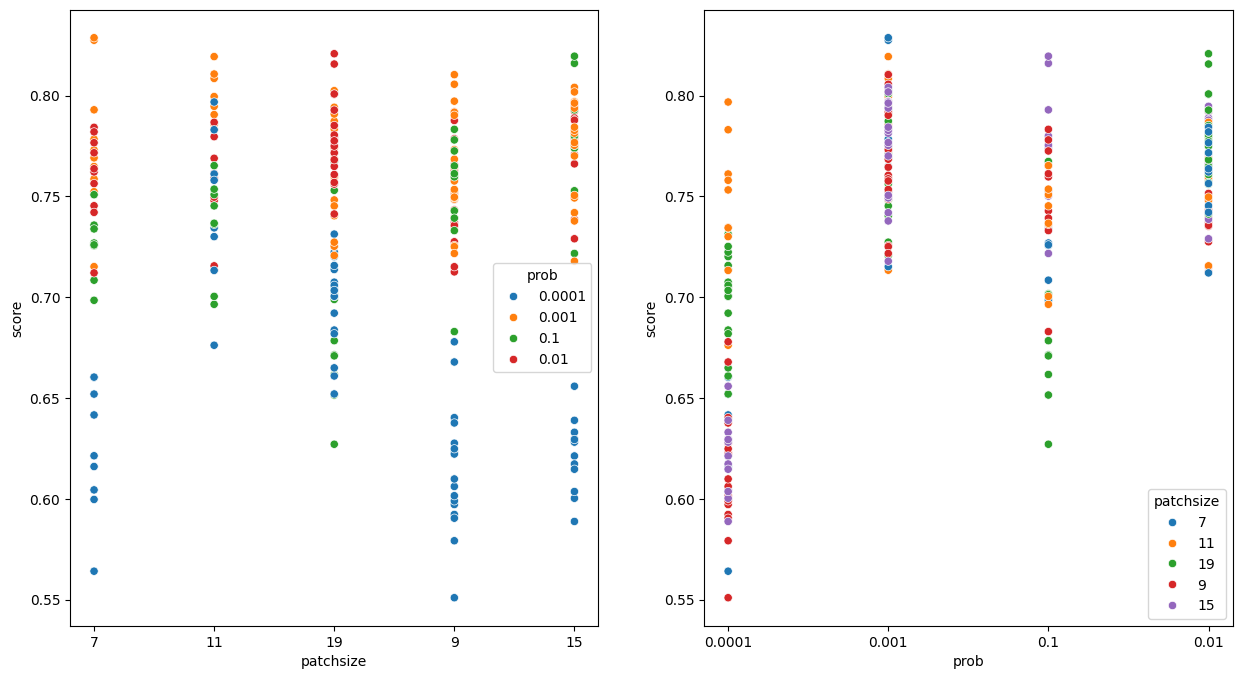

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(data = score_dic, y="score", hue="prob", x="patchsize", ax=ax[0])
sns.scatterplot(data = score_dic, y="score", x="prob", hue="patchsize", ax=ax[1])

# ax = plt.gca()
# ax[1].set_xscale('log')
# plt.show()

In [40]:
score_dic.keys()

dict_keys(['score', 'prob', 'patchsize', 'run'])

In [53]:
((score_df['patchsize'] == '11') & (score_df['prob'] == '0.0001')).sum()

10

0.7366646658663465


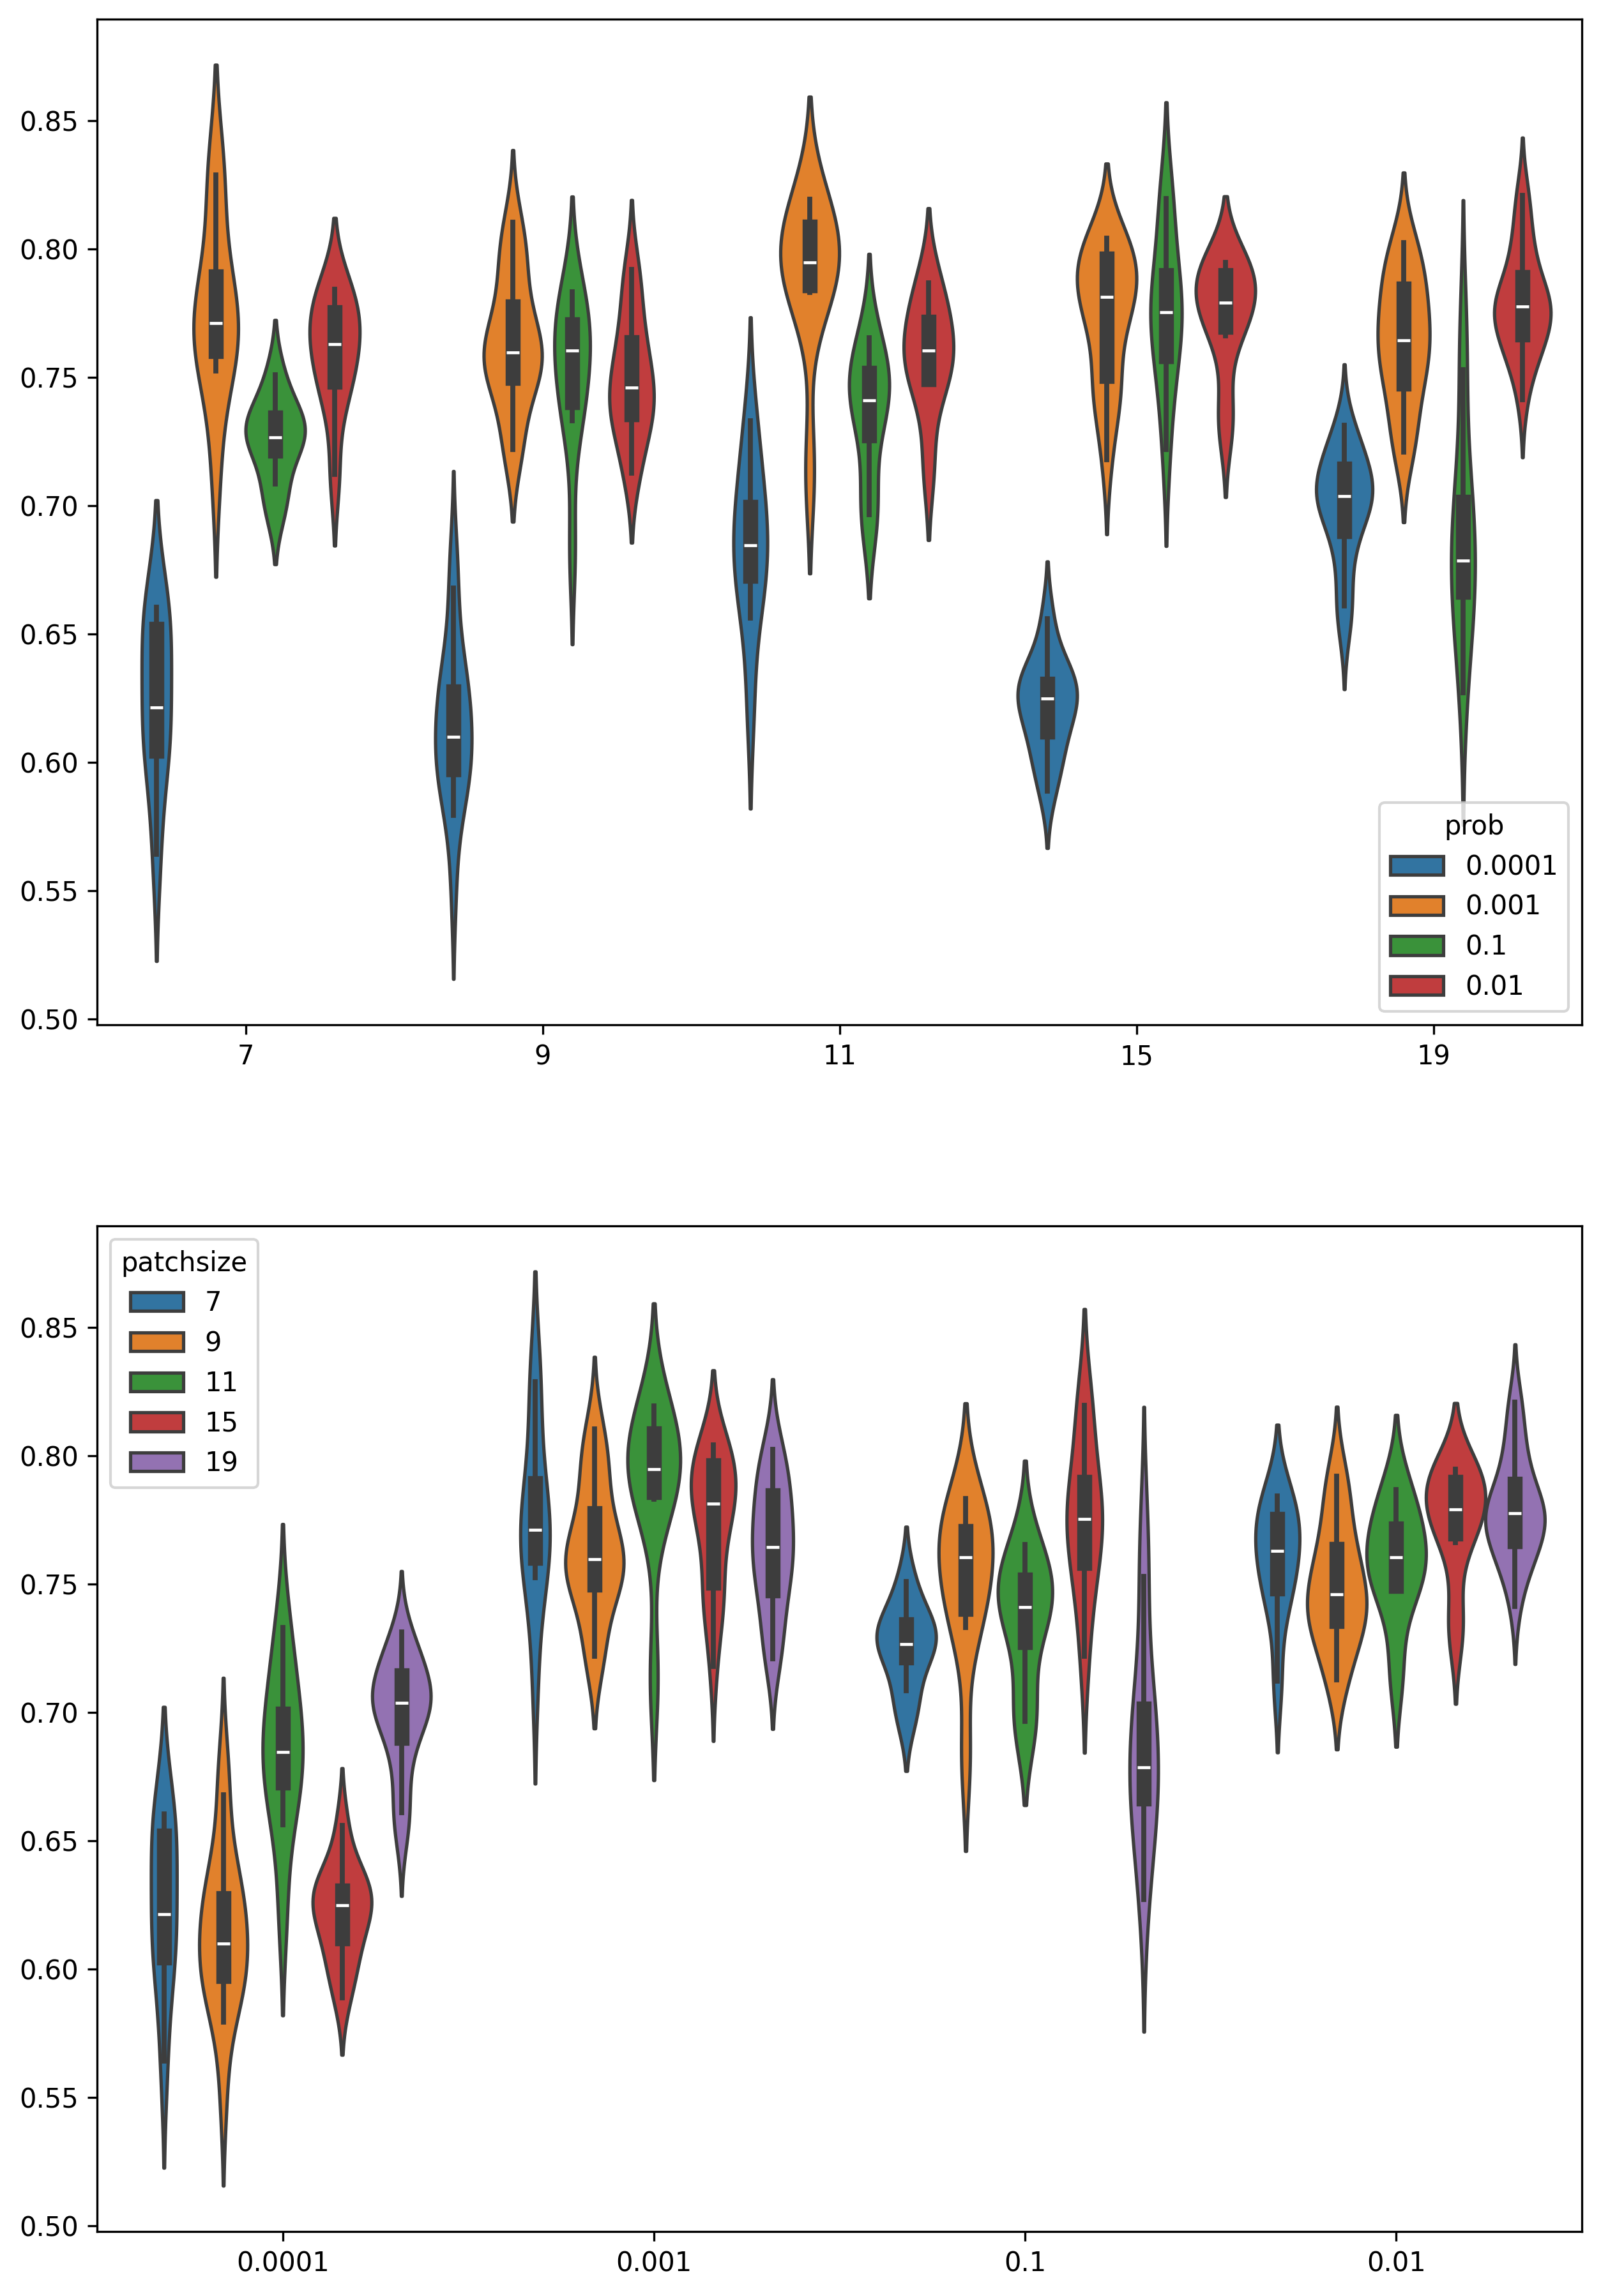

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15), dpi=300)

score_df = pd.DataFrame.from_dict(score_dic)

patch_order = list(map(str, sorted(np.unique(score_dic['patchsize']).astype(int))))
sns.violinplot(data = score_df, y="score", hue="prob", x="patchsize", ax=ax[0], order =patch_order)
sns.violinplot(data = score_df, y="score", x="prob", hue="patchsize", ax=ax[1], hue_order=patch_order)

print(score)
for axis in ax:
    axis.set_xlabel('')
    axis.set_ylabel('')

# ax = plt.gca()
# ax[1].set_xscale('log')
# plt.show()

<Axes: xlabel='prob', ylabel='score'>

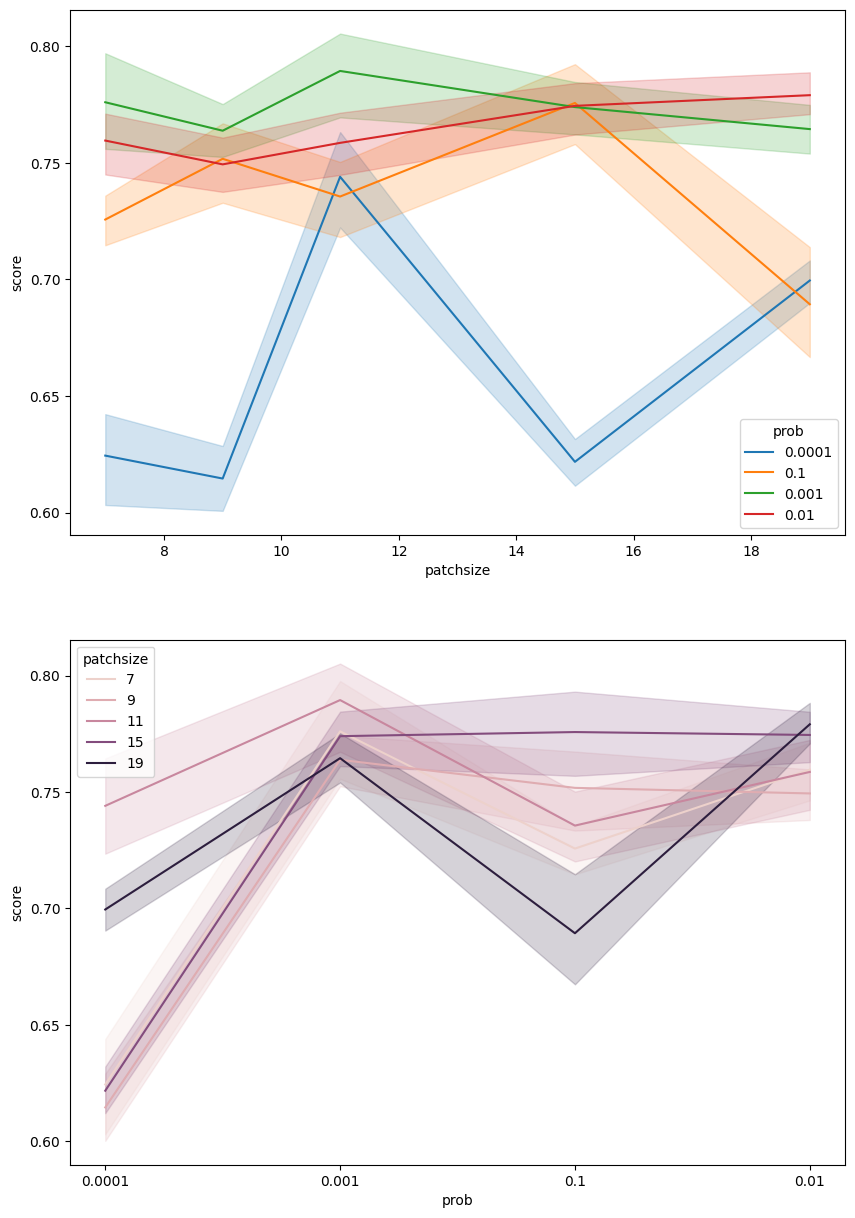

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

score_df[["patchsize"]] = score_df[["patchsize"]].apply(pd.to_numeric)

patch_order = list(map(str, sorted(np.unique(score_dic['patchsize']).astype(int))))
sns.lineplot(data = score_df.sort_values(by=['patchsize']), y="score", hue="prob", x="patchsize", ax=ax[0])
sns.lineplot(data = score_df, y="score", x="prob", hue="patchsize", ax=ax[1], hue_order=patch_order)
